In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [53]:
class deEmphasis:
    def __init__(self, coef=0.95):
        self.coef = coef
        self.prev = np.zeros(3)

    def smoothPos(self, pos):
        out = (pos + self.prev*(self.coef))/(1+self.coef)
        self.prev = out
        return out

0.035221330519614666 0.023049937809084754


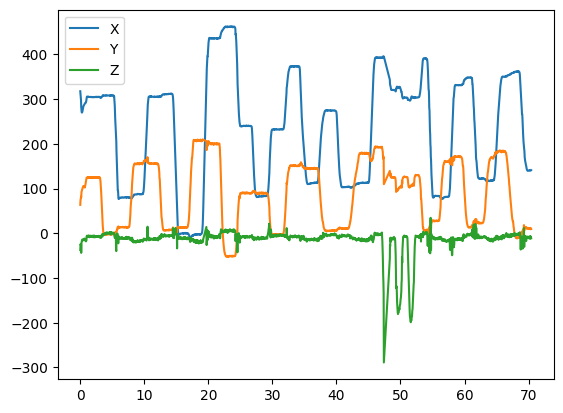

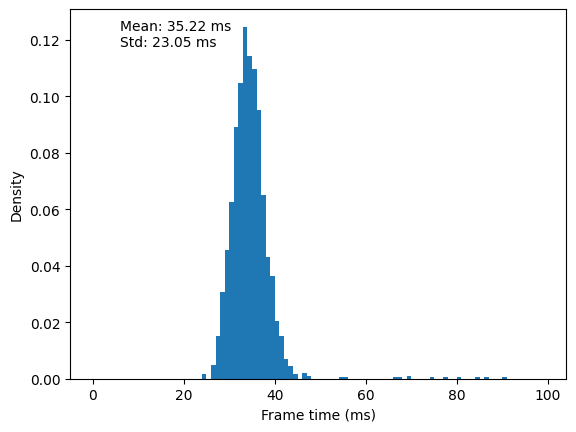

In [54]:
df = pd.read_csv('dataCapture.csv')
xs = df['X'].to_numpy()*1000
ys = df['Y'].to_numpy()*1000
zs = df['Z'].to_numpy()*1000
deemph = deEmphasis()
# for i in range(len(xs)):
#     xs[i], ys[i], zs[i] = deemph.smoothPos(np.array([xs[i], ys[i], zs[i]]))
times = df['Time'] - df['Time'][0]
dts = np.diff(times)
print(np.mean(dts), np.std(dts))
plt.plot(times, xs, label='X')
plt.plot(times, ys, label='Y')
plt.plot(times, zs, label='Z')
plt.legend()
plt.show()

plt.hist(dts*1000, bins=np.arange(0,100), density=True)
mean = np.mean(dts)*1000
std = np.std(dts)*1000
plt.text(0.1, 0.9, f"Mean: {mean:.2f} ms\nStd: {std:.2f} ms", transform=plt.gca().transAxes)
plt.xlabel("Frame time (ms)")
plt.ylabel("Density")
plt.show()





In [55]:
windows = [30,88,102,148,173,218,242,276,303,348,372,411,440,475,503,538,562,608,636,680,705,754,776,821,845,897,928,970,1007,1054,1088,1137,1164,1194,1245,1285,1316,1346,1557,1580,1603,1622,1651,1680,1760,1778,1865,1883]

points = np.zeros((len(windows)//2, 3))
totalPoints = 0
for i in range(len(windows)//2):
    totalPoints += windows[2*i+1] - windows[2*i]
scatterPoints = np.zeros((totalPoints, 3))
scatterIndex = 0
outputData = np.zeros((totalPoints, 3))
for i in range(len(windows)//2):
    x = xs[windows[2*i]:windows[2*i+1]]
    y = ys[windows[2*i]:windows[2*i+1]]
    z = zs[windows[2*i]:windows[2*i+1]]
    scatterPoints[scatterIndex:scatterIndex+len(x),0] = x
    scatterPoints[scatterIndex:scatterIndex+len(x),1] = y
    scatterPoints[scatterIndex:scatterIndex+len(x),2] = z
    
    x = x-np.mean(x)
    y = y-np.mean(y)
    z = z-np.mean(z)
    outputData[scatterIndex:scatterIndex+len(x),0] = x
    outputData[scatterIndex:scatterIndex+len(x),1] = y
    outputData[scatterIndex:scatterIndex+len(x),2] = z
    scatterIndex += len(x)
xErr = np.std(outputData[:,0])
yErr = np.std(outputData[:,1])
zErr = np.std(outputData[:,2])
print(xErr, yErr, zErr)

    



0.5290216750008793 0.8236055177568178 1.4445440401734595


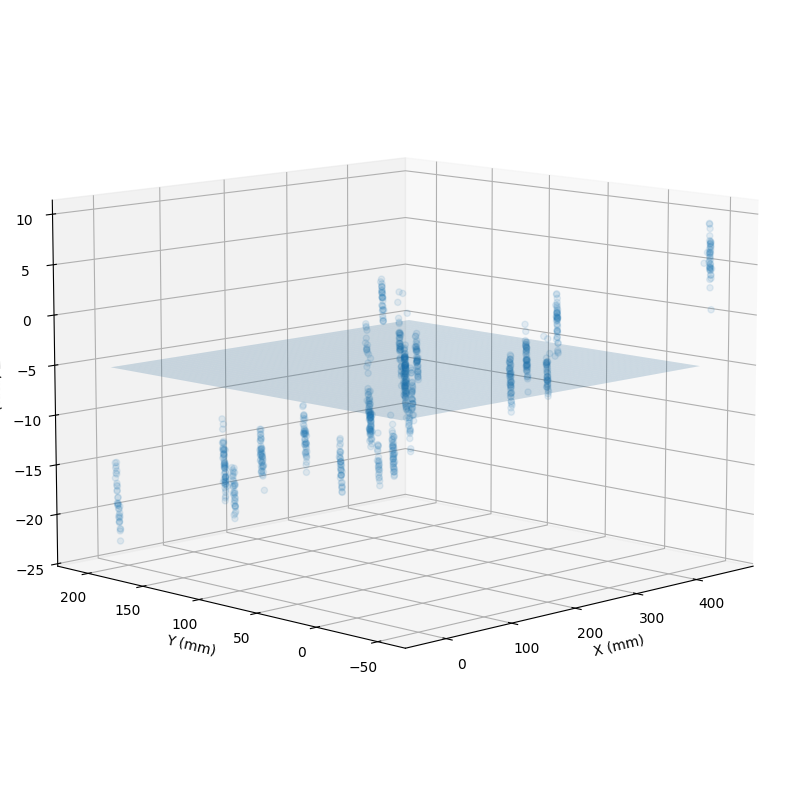

In [56]:
#make a 3d plot of the points
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scatterPoints[:,0], scatterPoints[:,1], scatterPoints[:,2], alpha=0.1)
#draw the z = 0 plane
xx, yy = np.meshgrid(range(-25,450), range(-50,200))
zz = np.zeros(xx.shape)-5
ax.plot_surface(xx, yy, zz, alpha=0.2)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.view_init(10, 225)

plt.show()

In [57]:
#z uncertainty when x and why change
zErr = np.std(zs[1054:1087])
print("Z uncertainty when x and y change: ", zErr)
#x uncertainty when y changed
xErr = np.std(xs[88:107])
print("X uncertainty when y changed: ", xErr)
yErr = np.std(ys[752:777])
print("Y uncertainty when x changed: ", yErr)


Z uncertainty when x and y change:  4.435264576138233
X uncertainty when y changed:  2.155475990500047
Y uncertainty when x changed:  2.056530835549291


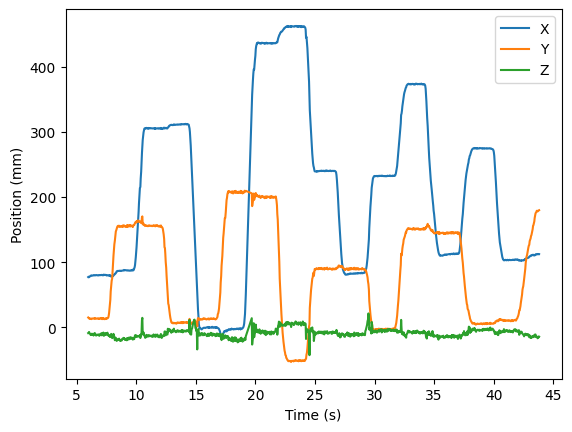

In [58]:
xFull = xs[171:1251]
yFull = ys[171:1251]
zFull = zs[171:1251]
timesFull = times[171:1251]
plt.plot(timesFull, xFull, label='X')
plt.plot(timesFull, yFull, label='Y')
plt.plot(timesFull, zFull, label='Z')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')
plt.show()

Latency

In [67]:
frameDeltas = np.array([-281+364,-504+598,-716+814,-953+1039,-1224+1294,-1449+1531,-1683+1770,-1897+1990,-2134+2226,-2363+2449])
TimeDeltas = frameDeltas/240*1000

print(np.mean(TimeDeltas), np.std(TimeDeltas), len(TimeDeltas)) 

362.9166666666667 31.261109136504487 10


In [ ]:
import uncertainties
totalLatency = uncertainties.ufloat(np.mean(TimeDeltas), np.std(TimeDeltas))
projectorLatency = uncertainties.ufloat(125, 2)
frameTime = uncertainties.ufloat(np.mean(dts)*1000, np.std(dts)*1000)


cameraLatency = totalLatency - projectorLatency - frameTime
print(cameraLatency)

(2.0+/-0.4)e+02


: 